In [4]:
import gdown
url='https://www.dropbox.com/s/xoomeq2ids9551y/opencv_bootcamp_assets_NB13.zip?dl=1'
output='data.zip'
gdown.download(url,output,quiet=True)
gdown.extractall('data.zip')

['tf_text_graph_ssd.py',
 'images/',
 'images/000000001000.jpg',
 'images/baseball.jpg',
 'images/giraffe-zebra.jpg',
 'images/soccer.jpg',
 'images/street.jpg',
 'models/',
 'models/ssd_mobilenet_v2_coco_2018_03_29/',
 'models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb',
 'models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt',
 'coco_class_labels.txt']

In [30]:
import cv2
import matplotlib.pyplot as plt

In [6]:
with open('/content/coco_class_labels.txt','r') as f:
  label=f.read().split('\n')

In [7]:
modelFile='/content/models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'
configFile='/content/models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt'

In [8]:
model=cv2.dnn.readNetFromTensorflow(modelFile,configFile)

In [26]:
def detect_objects(img,dim=300):
  blob=cv2.dnn.blobFromImage(img,1.0,size=(dim,dim),mean=(0,0,0),swapRB=True,crop=False)
  model.setInput(blob)
  objects=model.forward()
  return objects

In [11]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

In [12]:
def display_text(im, text, x, y):
    # Get text size
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]

    # Use text size to create a black rectangle
    cv2.rectangle(
        im,
        (x, y - dim[1] - baseline),
        (x + dim[0], y + baseline),
        (0, 0, 0),
        cv2.FILLED,
    )

    # Display text inside the rectangle
    cv2.putText(
        im,
        text,
        (x, y - 5),
        FONTFACE,
        FONT_SCALE,
        (0, 255, 255),
        THICKNESS,
        cv2.LINE_AA,
    )

In [31]:
def display_objects(im, objects, threshold=0.25):
    rows = im.shape[0]
    cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        # Find the class and confidence
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])

        # Recover original co-ordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)

        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(label[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)

    # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30, 10))
    plt.imshow(mp_img)
    plt.show()

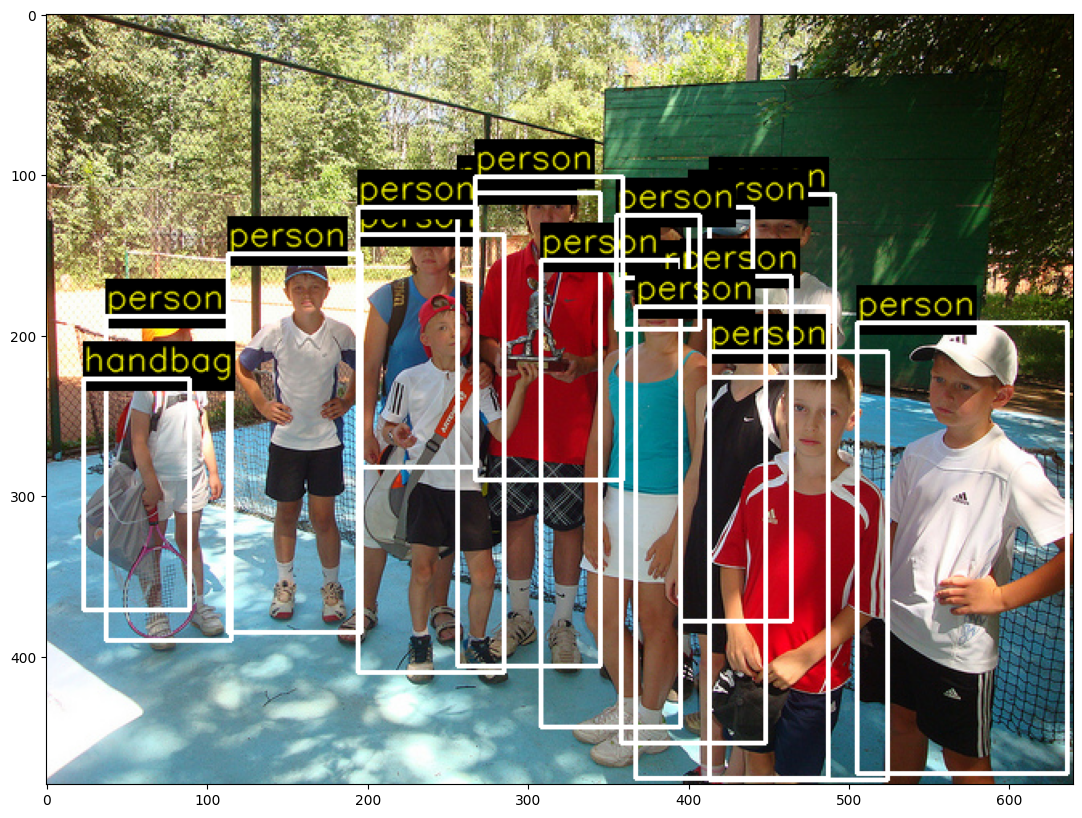

In [32]:
img=cv2.imread('/content/images/000000001000.jpg')
obj=detect_objects(img)
display_objects(img,obj)